In [2]:

from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from transformers import pipeline
import bs4 as bs
import urllib.request
import re
import nltk
from urllib.request import urlopen
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
import pandas as pd
import spacy
import pytextrank
from rouge import Rouge
import torch
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from transformers import BertTokenizer
import wikipedia as wiki
import pprint as pp
from collections import OrderedDict
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from transformers import pipeline
import bs4 as bs
import urllib.request
import re
import nltk
from urllib.request import urlopen



F:\anaconda setup\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [43]:
import math
import re
import nltk
import csv
from nltk.tokenize import word_tokenize
from csv import writer
from nltk.corpus import gutenberg, stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
#from keras.layers import LSTM
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import transformers as ppb
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
#from sklearn.svm import LSSVC
from mlxtend.evaluate import bias_variance_decomp
import random
import pandas as pd
nltk.download('wordnet')
from nltk.tokenize import regexp_tokenize
en_stops = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer 
from urllib import request
import numpy as np
from sklearn.model_selection import KFold

from sklearn.decomposition import PCA # Needed for dimension reduction
from sklearn.preprocessing import StandardScaler
from yellowbrick.text import TSNEVisualizer


from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import homogeneity_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.text import TSNEVisualizer
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
#name_book=nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


insert the 5 texts into a list 

In [68]:
articles_text=[]
articles=['history.txt','politics article.txt','medicine.txt','philosoghy.txt','cs.txt']
for text in articles:
    article_text=open(text,'r',encoding="utf8").read()
    articles_text.append(article_text)
    

human summary for evaluation 

In [5]:
human_summary=[]
summaries=['summary_history.txt','summary_politics article.txt','summary_medicine.txt','summary_philosoghy.txt','summary_cs.txt']
for summary in summaries:
    text=open(summary,'r',encoding="utf8").read()
    human_summary.append(text)

In [6]:
names=["history","politics article","medicine","philosoghy","computer science"]
rouge = Rouge()

Data preparation

In [7]:

def prepare_data(name,label):
 
    with open(name,encoding='utf-8') as f:
        lines =f.read().lower()
    book_words= regexp_tokenize(lines,r'([a-zA-Z0-9]{3,})[\,|\s|\.]') # remove #@%^&*? from words 
    file=[]
    book_data=[]
    for w in book_words: # remove stop words 
        if w not in en_stops:
            file.append(w)
    lemmatizer = WordNetLemmatizer()
    lemmatized_output=[]
    lemmatized_output = [lemmatizer.lemmatize(w) for w in file]
    #print( lemmatized_output)
    book=[]
    num_part=int(len(file)/50)
    for i in range(num_part): 
        
        book.append(file[i*50:(i+1)*50])
        book_data.append(' '.join(book[i]))
        
    df = pd.DataFrame({"partitions":book_data})
    df[1]=label # give every partations label with book name 
    dataframe= pd.DataFrame()
    dataframe= df.sample(n=num_part)
    return dataframe

In [8]:
label=[0,1,2,3,4]

In [70]:
data =pd.DataFrame()
for i in range(5):
    
    data=data.append(prepare_data(articles[i],label[i]))
data = data.rename(columns={1: 'topic'})
data

,partitions,topic
32,accused inciting violence earning second purge...,0
102,worries china would face invasion either north...,0
78,terms consolidating political control case mil...,0
14,weapon soviets invaded would soon mired endles...,0
40,dissent party case deng could silenced unpatri...,0
...,...,...
15,boundary used automatically classify subsequen...,4
13,data points figure represent separate student ...,4
17,classified using svm algorithm figure illustra...,4
1,student attentiveness many approaches depended...,4


data2 is used ti find out similar topics 

In [104]:
articles2=["history.txt",'history2.txt',"politics article.txt",'politics article2.txt',"medicine.txt",'medicine2.txt',"philosoghy.txt",'philosoghy2.txt',"cs.txt",'cs2.txt']
data2 =pd.DataFrame()
label2=[0,1,2,3,4,5,6,7,8,9]
for i in range(10):
    
    data2=data2.append(prepare_data(articles2[i],label2[i]))
data2 = data2.rename(columns={1: 'topic'})
data2

,partitions,topic
33,protest 1989 would enjoy level populist suppor...,0
109,love story audience members seemed interested ...,0
104,deng hands vast one new power new relationship...,0
25,flow fall saigon birgerson 1997 delicate balan...,0
42,drawn placing vietnam ussr opposition diplomac...,0
...,...,...
3,education instruction expected improving instr...,9
11,labeled attentive inattentive depending distan...,9
19,licensed use limited university ottawa downloa...,9
8,detects counts various behaviors indicate atte...,9


Feature engineering

In [97]:
#BOW
coun_vect = CountVectorizer()
BOW_vectors = coun_vect.fit_transform(data["partitions"])
count_array = BOW_vectors.toarray()



df = pd.DataFrame(count_array,columns = coun_vect.get_feature_names())

BOW_vectors
df

,000,017,100,116th,117,123,12th,13th,158,159,...,younger,youth,zedong,zero,zhang,zhao,zhenbao,zhong,zhou,ziyang
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
#TF_IDF
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(data["partitions"])

df1 = pd.DataFrame(tfidf_vectorizer_vectors.toarray(),columns=tfidf_vectorizer.get_feature_names())


first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[1]
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)
df1

,000,017,100,116th,117,123,12th,13th,158,159,...,younger,youth,zedong,zero,zhang,zhao,zhenbao,zhong,zhou,ziyang
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.137147,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
#TF_IDF
tfidf_vectorizer2=TfidfVectorizer(use_idf=True)
tfidf_vectorizer_vectors2=tfidf_vectorizer.fit_transform(data2["partitions"])



In [12]:
#N_gram
count_vect = CountVectorizer(ngram_range=(1,2))
ngram_vectors=count_vect.fit_transform(data["partitions"])
df1 = pd.DataFrame(ngram_vectors.toarray(),columns=count_vect.get_feature_names())
df1

,000,000 000,000 drug,000 funding,000 less,000 mccutcheon,000 people,000 prostitutes,000 vietnamese,000 women,...,zhenbao territory,zhong,zhong china,zhong firmly,zhong perhaps,zhong xidong,zhou,zhou enlai,ziyang,ziyang shambaugh
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#general func of train_test_split
def training_testing(matrix):
    x_data=matrix.toarray()
    y_data=data["topic"]

    X_tr, X_tst, y_tr, y_tst = train_test_split(x_data, y_data, test_size=0.30, random_state=45)
    
    return(X_tr, X_tst, y_tr, y_tst)
    

In [150]:
def models (model):
    MODEL=model
    MODEL.fit(X_train,y_train)
    MODEL_PREDICTION=MODEL.predict(X_test)
    print(accuracy_score(MODEL_PREDICTION, y_test))
    print(confusion_matrix(MODEL_PREDICTION, y_test))
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()
    print(classification_report(MODEL_PREDICTION, y_test))
    print("pred",MODEL_PREDICTION)
    print("y_test",np.array(y_test))
    return 

4 classification models 

 **********************for BOW **********************
 **********************for SVC() **********************
0.9425287356321839
[[31  0  1  0  4]
 [ 0 17  0  0  0]
 [ 0  0 15  0  0]
 [ 0  0  0 17  0]
 [ 0  0  0  0  2]]


F:\anaconda setup\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:119: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)


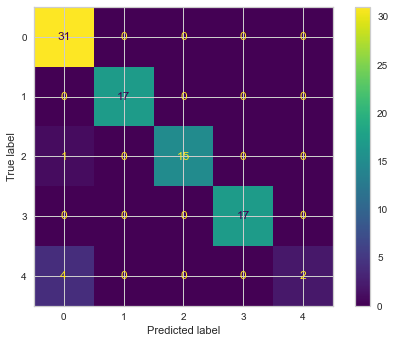

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        36
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        15
           3       1.00      1.00      1.00        17
           4       0.33      1.00      0.50         2

    accuracy                           0.94        87
   macro avg       0.85      0.97      0.88        87
weighted avg       0.97      0.94      0.95        87

pred [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 0 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 0 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 0 0 0 2 0 0 2 0 1 0 2
 0 3 0 1 3 0 3 0 1 2 3 0 3]
y_test [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]
 **********************for RandomForestClassifier() **********************
0.9540229885057471
[[31  0  2  0  2]
 [ 0 17  0  0  0]
 [ 0  0 14  0

F:\anaconda setup\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:119: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)


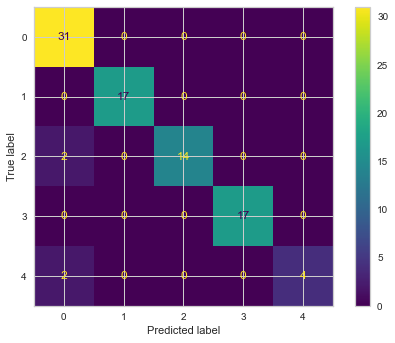

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        35
           1       1.00      1.00      1.00        17
           2       0.88      1.00      0.93        14
           3       1.00      1.00      1.00        17
           4       0.67      1.00      0.80         4

    accuracy                           0.95        87
   macro avg       0.91      0.98      0.93        87
weighted avg       0.96      0.95      0.96        87

pred [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 0 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 0 0 0 4 0 3 3 1 0 3 3 1 2 3 0 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 0 3]
y_test [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]
 **********************for GaussianNB() **********************
1.0
[[31  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 16  0  0]
 [ 0  0  0 17  0]
 [ 0

F:\anaconda setup\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:119: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)


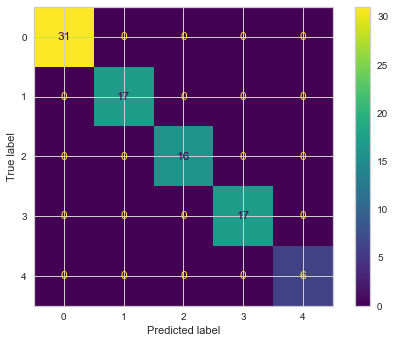

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         6

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87

pred [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]
y_test [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]
 **********************for MLPClassifier() **********************
1.0
[[31  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 16  0  0]
 [ 0  0  0 17  0]
 

F:\anaconda setup\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:119: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)


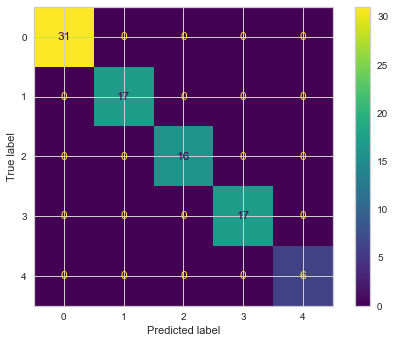

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         6

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87

pred [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]
y_test [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]
 **********************for TFIDF **********************
 **********************for SVC() **********************
0.8850574712643678
[[31  2  2  

F:\anaconda setup\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:119: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)


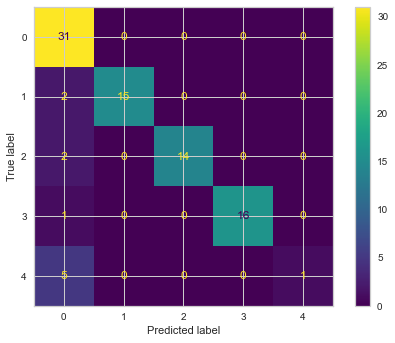

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        41
           1       0.88      1.00      0.94        15
           2       0.88      1.00      0.93        14
           3       0.94      1.00      0.97        16
           4       0.17      1.00      0.29         1

    accuracy                           0.89        87
   macro avg       0.77      0.95      0.80        87
weighted avg       0.94      0.89      0.90        87

pred [0 0 0 0 3 1 0 0 0 2 0 2 2 2 0 0 2 0 0 0 3 1 3 1 1 2 1 0 3 0 1 1 1 0 0 0 0
 0 0 0 2 1 0 3 2 0 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 0 0 0 2 0 0 2 0 1 0 2
 0 3 0 1 3 0 3 0 1 2 3 0 3]
y_test [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]
 **********************for RandomForestClassifier() **********************
0.9310344827586207
[[31  0  1  1  4]
 [ 0 17  0  0  0]
 [ 0  0 15  0

F:\anaconda setup\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:119: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)


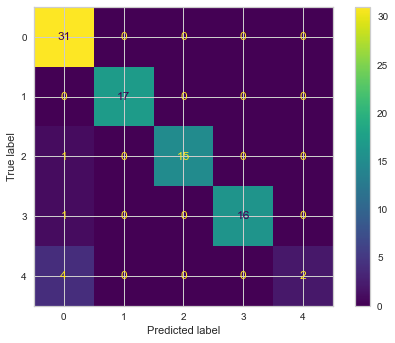

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        37
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        15
           3       0.94      1.00      0.97        16
           4       0.33      1.00      0.50         2

    accuracy                           0.93        87
   macro avg       0.84      0.97      0.87        87
weighted avg       0.96      0.93      0.94        87

pred [2 0 0 0 3 1 0 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 0 2 1 0 3 2 0 0 0 4 0 3 3 1 0 3 3 1 2 3 0 3 1 0 0 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 0 3]
y_test [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]
 **********************for GaussianNB() **********************
1.0
[[31  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 16  0  0]
 [ 0  0  0 17  0]
 [ 0

F:\anaconda setup\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:119: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)


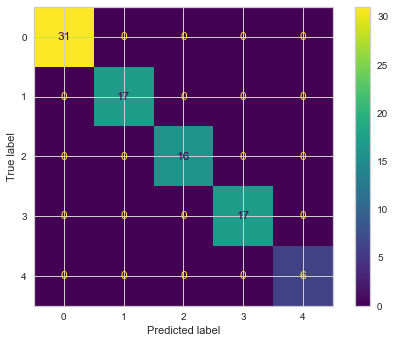

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         6

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87

pred [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]
y_test [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]
 **********************for MLPClassifier() **********************
1.0
[[31  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 16  0  0]
 [ 0  0  0 17  0]
 

F:\anaconda setup\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\anaconda setup\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:119: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)


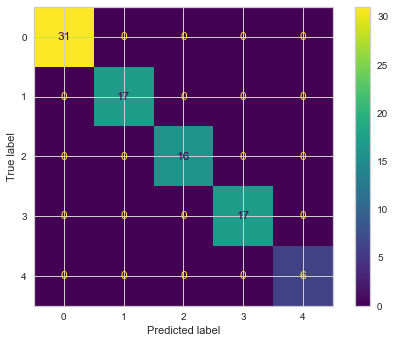

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         6

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87

pred [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]
y_test [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]
 **********************for N_gram **********************
 **********************for SVC() **********************
0.8735632183908046
[[31  2  3 

F:\anaconda setup\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:119: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)


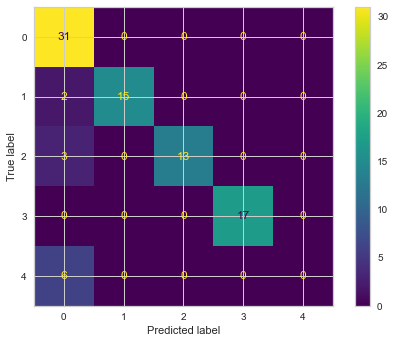

F:\anaconda setup\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.74      0.85        42
           1       0.88      1.00      0.94        15
           2       0.81      1.00      0.90        13
           3       1.00      1.00      1.00        17
           4       0.00      0.00      0.00         0

    accuracy                           0.87        87
   macro avg       0.74      0.75      0.74        87
weighted avg       0.95      0.87      0.90        87

pred [2 0 0 0 3 0 3 0 0 0 0 2 2 2 0 0 0 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 0 2 0 0 3 0 0 0 0 0 0 3 3 1 0 3 3 1 2 3 2 3 1 0 0 0 0 2 0 0 2 0 1 0 2
 0 3 0 1 3 0 3 0 1 2 3 0 3]
y_test [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]
 **********************for RandomForestClassifier() **********************
0.9310344827586207
[[31  1  2  0  3]
 [ 0 16  0  0  0]
 [ 0  0 14  0

F:\anaconda setup\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:119: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)


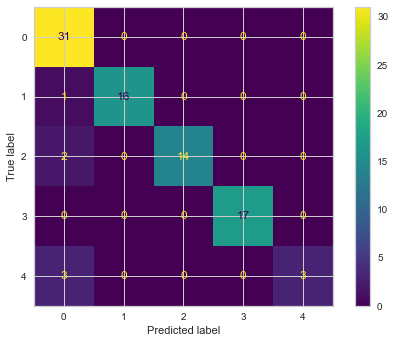

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        37
           1       0.94      1.00      0.97        16
           2       0.88      1.00      0.93        14
           3       1.00      1.00      1.00        17
           4       0.50      1.00      0.67         3

    accuracy                           0.93        87
   macro avg       0.86      0.97      0.90        87
weighted avg       0.95      0.93      0.93        87

pred [2 0 0 0 3 1 3 0 0 0 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 0 0 3 2 4 0 0 0 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 0 0 0 2 0 1 0 2
 0 3 0 1 3 0 3 0 1 2 3 0 3]
y_test [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]
 **********************for GaussianNB() **********************
0.9885057471264368
[[30  0  0  0  0]
 [ 1 17  0  0  0]
 [ 0  0 16  0  0]
 [ 0  0

F:\anaconda setup\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:119: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)


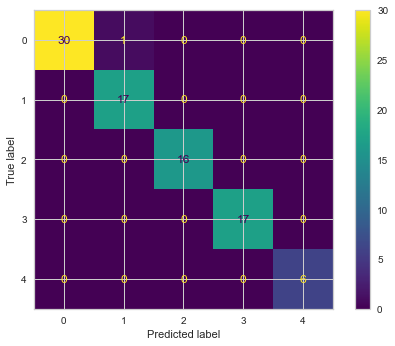

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         6

    accuracy                           0.99        87
   macro avg       0.99      0.99      0.99        87
weighted avg       0.99      0.99      0.99        87

pred [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 1 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]
y_test [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]
 **********************for MLPClassifier() **********************
1.0
[[31  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 16  0  0]
 [ 0  0  0 17  0]
 

F:\anaconda setup\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:119: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)


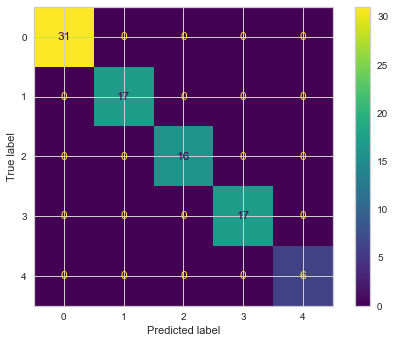

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         6

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87

pred [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]
y_test [2 0 0 0 3 1 3 0 0 2 0 2 2 2 0 0 2 0 1 2 3 1 3 1 1 2 1 0 3 0 1 1 1 1 0 0 0
 0 0 4 2 1 0 3 2 4 0 0 4 0 3 3 1 0 3 3 1 2 3 2 3 1 0 4 0 0 2 0 0 2 0 1 0 2
 0 3 4 1 3 0 3 0 1 2 3 4 3]


In [151]:
models_list=[SVC()
             ,RandomForestClassifier()
             ,GaussianNB()
             , MLPClassifier()]
features_engineering=[BOW_vectors,tfidf_vectorizer_vectors,ngram_vectors]
features_engineering_names=['BOW','TFIDF','N_gram']

   
for j in range(len(features_engineering)):  
    X_train, X_test, y_train, y_test=training_testing(features_engineering[j]) 
    print(' **********************'+'for '+features_engineering_names[j]+' **********************')
    for i in models_list:
        print(' **********************'+'for '+str(i)+' **********************')
        models(i)

-----------------------------------------------------------------------------------------------------------------------

2 Clustering models 

original data visualization 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

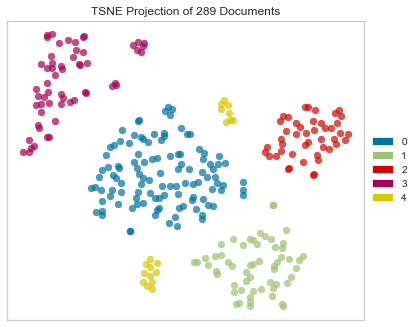

<AxesSubplot:title={'center':'TSNE Projection of 289 Documents'}>

In [138]:
   
tsne = TSNEVisualizer()
tsne.fit(tfidf_vectorizer_vectors,data["topic"])
tsne.show()
    
    


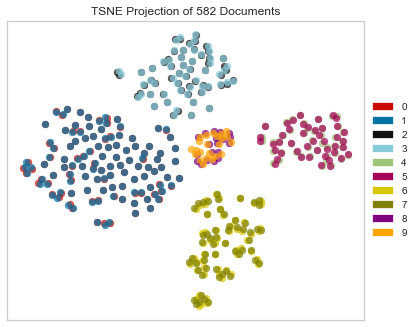

<AxesSubplot:title={'center':'TSNE Projection of 582 Documents'}>

In [140]:

tsne = TSNEVisualizer(colors=("r","b","k","c","g","m","y",'olive', 'purple',"orange"))
tsne.fit(tfidf_vectorizer_vectors2,data2["topic"])
tsne.show()

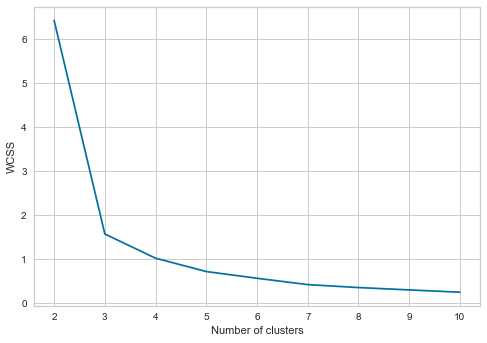

In [52]:
pca = PCA(n_components=2)
pca.fit(np.array(tfidf_vectorizer_vectors.todense()))
dff=pca.transform(np.array(tfidf_vectorizer_vectors.todense()))


wcss = []
for i in range(2,11):
   model = KMeans(n_clusters=i, init='k-means++',random_state=0)
   #model.fit(BOW_vectors)
   ypred=model.fit_predict(dff)
   wcss.append(model.inertia_)
   centroids, model_labels = model.cluster_centers_, model.labels_
#plt.figure(figsize=(10,10))
plt.plot(range(2,11), wcss,scalex=True, scaley=True)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

finding the best number of K 

1)kmeans 

In [42]:
lda = LatentDirichletAllocation(n_components=5,random_state=0) 
for i in range(len(features_engineering)):
    LDA_out= lda.fit_transform(features_engineering[i])
    pca = PCA(n_components=2)
    pca.fit(LDA_out)
    dff=pca.transform(LDA_out)
    model =KMeans(n_clusters=5, init='k-means++',random_state=0)
    ypred=model.fit_predict(dff)
 
    silhouette_avg = silhouette_score(dff ,ypred,metric='euclidean')
    print(' **********************'+'for '+features_engineering_names[i]+' **********************')
    print("The average silhouette_score is :", silhouette_avg)



 **********************for BOW **********************
The average silhouette_score is : 0.7283129527893762
 **********************for TFIDF **********************
The average silhouette_score is : 0.7915097563709251
 **********************for N_gram **********************
The average silhouette_score is : 0.9397556208487159


2) agglomirative

In [152]:
lda = LatentDirichletAllocation(n_components=5,random_state=0) 
for i in range(len(features_engineering)):
    LDA_out= lda.fit_transform(features_engineering[i])
    pca = PCA(n_components=2)
    pca.fit(LDA_out)
    dff=pca.transform(LDA_out)
    model =AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
    ypred=model.fit_predict(dff)
    silhouette_avg = silhouette_score(dff ,ypred,metric='euclidean')
    print(' **********************'+'for '+features_engineering_names[i]+' **********************')
    print("The average silhouette_score is :", silhouette_avg)
    




 **********************for BOW **********************
The average silhouette_score is : 0.7064939601871634
 **********************for TFIDF **********************
The average silhouette_score is : 0.8011145941210905
 **********************for N_gram **********************
The average silhouette_score is : 0.9398782311327739


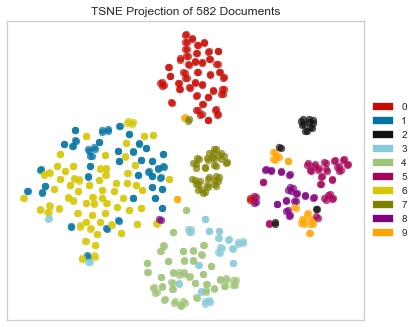

<AxesSubplot:title={'center':'TSNE Projection of 582 Documents'}>

In [142]:
tfidf_vectorizer_vectors2

model =KMeans(n_clusters=10, init='k-means++',random_state=0)
ypred=model.fit_predict(np.array(tfidf_vectorizer_vectors2.todense()))

tsne = TSNEVisualizer(colors=("r","b","k","c","g","m","y",'olive', 'purple',"orange"))
tsne.fit(np.array(tfidf_vectorizer_vectors2.todense()),ypred)
tsne.show()

get coherence score

In [64]:
my_data=[]
for i in range(289):
    a=data.iloc[i,0]
    my_data.append(a.split())
    
print(my_data)

[['families', 'mercilessly', 'persecuted', 'massacred', 'expelled', 'hung', '1979', 'simultaneous', 'condemnation', 'invasion', 'cambodia', 'supposed', 'support', 'foriegn', 'chinese', 'clearly', 'contradictory', 'thus', 'suggests', 'neither', 'genuine', 'concerns', 'rather', 'pretexts', 'reality', 'political', 'implications', 'nation', 'invading', 'ally', 'expelling', 'nationals', 'real', 'reason', 'china', 'would', 'condemn', 'actions', 'certainly', 'true', 'ccp', 'reacted', 'vietnam', 'attempting', 'establish', 'hegemony', 'southeast', 'asia', 'reality', 'deeper'], ['conditions', 'would', 'lead', 'eventual', 'decision', 'invade', 'vietnam', 'tension', 'china', 'ussr', 'may', 'analyzed', 'several', 'ways', 'could', 'argued', 'already', 'sort', 'unofficial', 'occurring', 'soviet', 'union', 'china', 'throughout', 'late', '1960s', '1970s', 'deshpande', '1969', 'included', 'skirmishes', 'along', 'northern', 'border', 'one', 'march', '1969', 'chinese', 'ambush', 'soviet', 'border', 'guard

In [65]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
import gensim
from gensim.utils import simple_preprocess

import pyLDAvis
from pprint import pprint



id2word = corpora.Dictionary(my_data)
texts = my_data
corpus = [id2word.doc2bow(text) for text in texts]
#print(corpus[:1])
# Human readable format of corpus (term-frequency)
read=[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
#print(read)
lda_model = LdaModel(corpus=corpus,
                    id2word=id2word,
                    num_topics=5, 
                    random_state=100,
                    update_every=1,
                    chunksize=100,
                    passes=10,
                    alpha='auto',
                    per_word_topics=True)

#Print the Keyword in the 5 topics
# print(lda_model.print_topics())
# doc_lda = lda_model[corpus]
    
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=my_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=id2word)
vis



F:\anaconda setup\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
F:\anaconda setup\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
F:\anaconda setup\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt 


Perplexity:  -7.818934898603334

Coherence Score:  0.3648550229524109


F:\anaconda setup\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.037072 -0.202951       1        1  34.828656
1      0.144981  0.156807       2        1  30.453195
2     -0.239121  0.063419       3        1  20.691243
4      0.012782 -0.022847       4        1   7.453987
0      0.044285  0.005572       5        1   6.572920, topic_info=           Term       Freq      Total Category  logprob  loglift
2141      women  95.000000  95.000000  Default  30.0000  30.0000
3369  investors  53.000000  53.000000  Default  29.0000  29.0000
2890        ppd  63.000000  63.000000  Default  28.0000  28.0000
1173     future  92.000000  92.000000  Default  27.0000  27.0000
47      vietnam  67.000000  67.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
59        could   2.964661  16.103125   Topic5  -5.7695   1.0300
1115   addition   2.601193   9.431322   Topic5  -5.9003   1.4341
1791        far   2.863285  31.078721   Topic5  -5.8043   0.3377
2974      risks   2.604925   9.981637   Topic5  -5.8988   1.3789
2097     number   2.621835  19.337027   Topic5  -5.8924   0.7241

[287 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1159      1  0.299939    000
1159      4  0.599878    000
383       4  0.503305   1968
50        5  0.544364   1969
1902      1  0.526906   2007
...     ...       ...    ...
1627      5  0.178566   work
48        1  0.705491  would
48        2  0.138031  would
48        3  0.107357  would
48        4  0.046010  would

[418 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 5, 1])

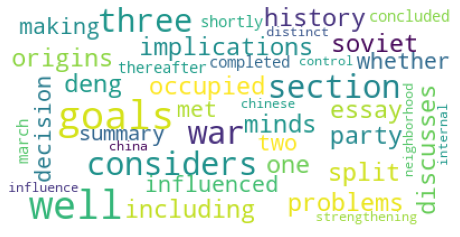

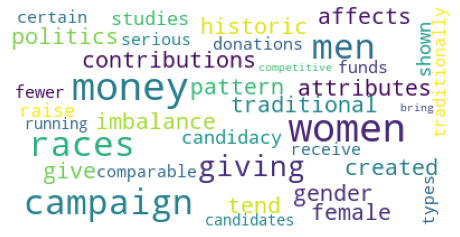

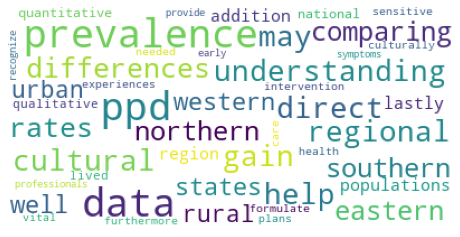

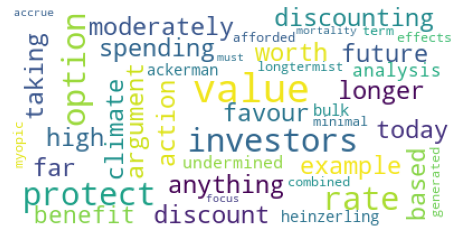

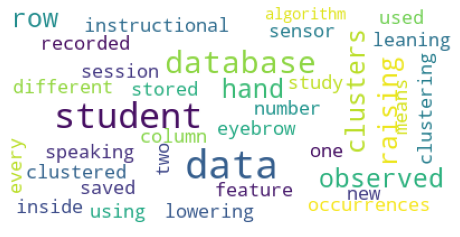

In [62]:
import wordcloud
dat =pd.DataFrame()
for i in range(5):
    
    dat=prepare_data(articles[i],label[i])
    x=dat.iloc[:,0:1].to_numpy()
    
    wc = wordcloud.WordCloud(background_color='white', max_words=200, 
                             max_font_size=35)
    wc = wc.generate(x[0][0])
    fig = plt.figure(num=1)
    plt.axis('off')
    plt.imshow(wc, cmap=None)
    plt.show()

In [71]:
# function get_top_n_woeds by  Susan Li  link:https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

for i in range(5):
    book=prepare_data(articles[i],label[i])
    common_words_book = get_top_n_words(book["partitions"], 10)
    print(f"top 10 frequent words in book {i} is: \n ")
    for x in range(len(common_words_book)):
        print(common_words_book[x])
common_words_book3=get_top_n_words(book["partitions"], 10)

top 10 frequent words in book 0 is: 
 
('vietnam', 95)
('war', 90)
('china', 87)
('soviet', 67)
('deng', 65)
('chinese', 65)
('vietnamese', 61)
('invasion', 51)
('power', 46)
('pla', 44)
top 10 frequent words in book 1 is: 
 
('women', 111)
('candidates', 44)
('female', 42)
('campaign', 33)
('men', 30)
('money', 30)
('donors', 22)
('gender', 21)
('political', 19)
('fundraising', 18)
top 10 frequent words in book 2 is: 
 
('ppd', 68)
('studies', 46)
('risk', 43)
('factors', 29)
('mothers', 22)
('associated', 19)
('india', 18)
('higher', 16)
('health', 15)
('cultural', 14)
top 10 frequent words in book 3 is: 
 
('future', 71)
('investors', 58)
('capitalism', 51)
('time', 32)
('value', 31)
('term', 30)
('immortal', 28)
('rate', 28)
('market', 26)
('corporations', 23)
top 10 frequent words in book 4 is: 
 
('student', 32)
('data', 28)
('algorithm', 25)
('used', 22)
('learning', 19)
('students', 15)
('attentiveness', 14)
('attentive', 12)
('inattentive', 11)
('using', 11)


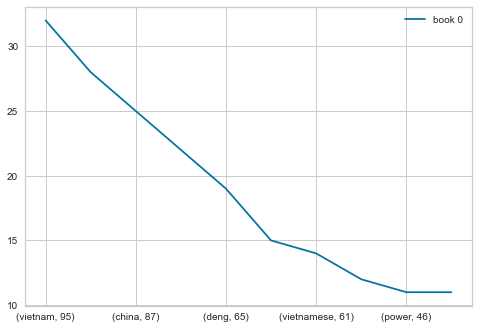

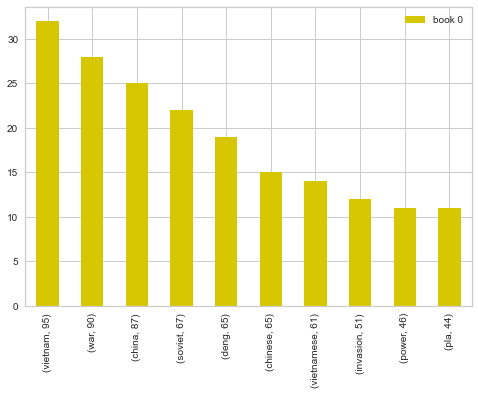

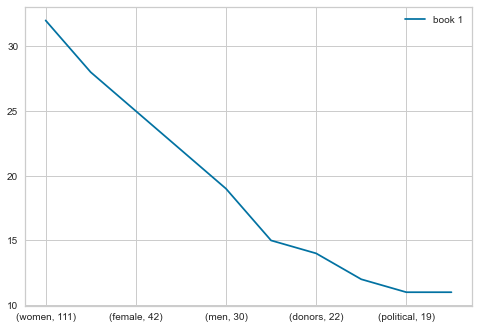

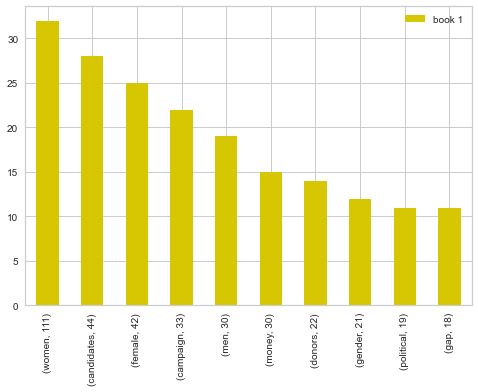

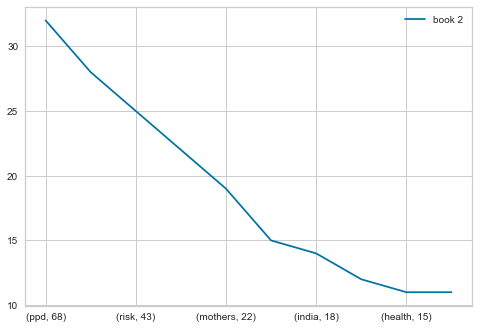

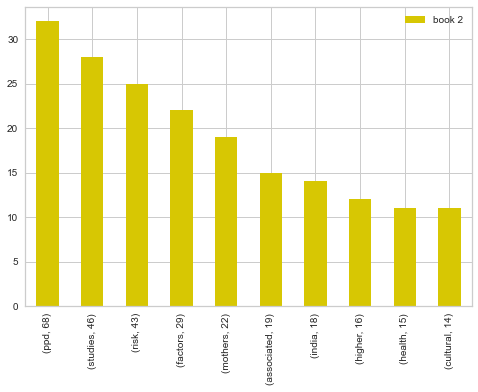

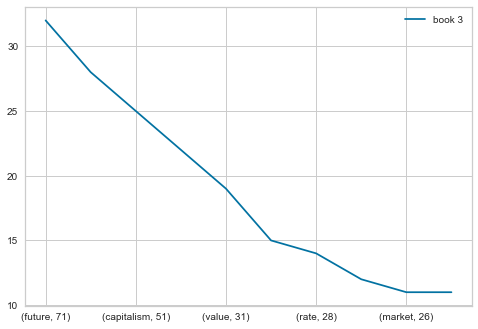

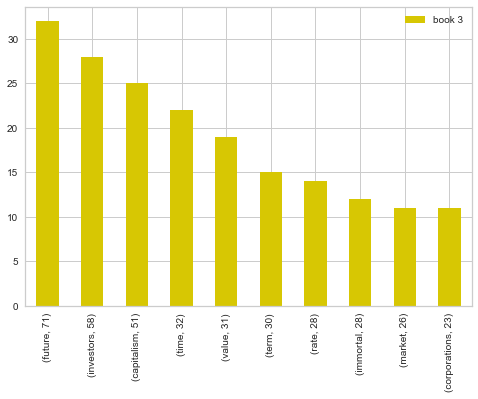

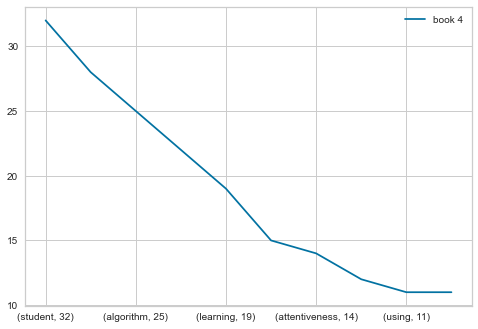

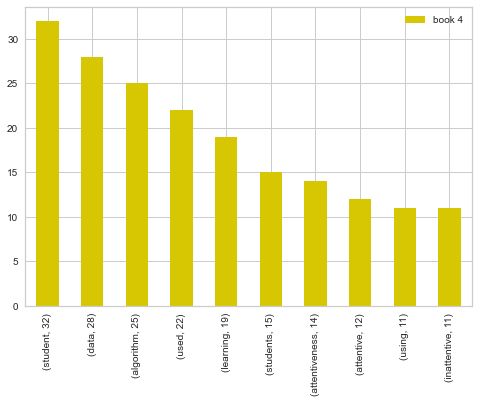

In [74]:
for i in range(5):
    dat=prepare_data(articles[i],label[i])
    common_words = get_top_n_words(dat["partitions"], 10)
    df2=pd.DataFrame(common_words_book3,common_words,columns=['label',f'book {i}'])
    df2.plot()
    df2.plot.bar(stacked=True,color='y')

------------------------------------------------------------------------------------------------------------------------

Text summarization

1) lexrank 

In [153]:
all_LEX_summary=[]
for article in articles_text:
    my_parser = PlaintextParser.from_string(article,Tokenizer('english'))
    lex_rank_summarizer = LexRankSummarizer()
    lexrank_summary = lex_rank_summarizer(my_parser.document,sentences_count=20)
    summary_LEX=""
    # Printing the summary
    for sentence in lexrank_summary:
       #print(sentence)
       summary_LEX+= str(sentence)
    all_LEX_summary.append(summary_LEX)

In [154]:
for i in range(len(all_LEX_summary)):
    print("********************"+names[i]+"********************")
    print(rouge.get_scores(all_LEX_summary[i], human_summary[i],avg=True))

********************history********************
{'rouge-1': {'r': 0.475, 'p': 0.12794612794612795, 'f': 0.20159150859289804}, 'rouge-2': {'r': 0.15454545454545454, 'p': 0.03288201160541586, 'f': 0.0542264723859091}, 'rouge-l': {'r': 0.3875, 'p': 0.10437710437710437, 'f': 0.1644562300783092}}
********************politics article********************
{'rouge-1': {'r': 0.4174757281553398, 'p': 0.11590296495956873, 'f': 0.18143459575450877}, 'rouge-2': {'r': 0.12142857142857143, 'p': 0.02446043165467626, 'f': 0.04071856008318712}, 'rouge-l': {'r': 0.3786407766990291, 'p': 0.10512129380053908, 'f': 0.16455695862370712}}
********************medicine********************
{'rouge-1': {'r': 0.3425414364640884, 'p': 0.23134328358208955, 'f': 0.2761692602211299}, 'rouge-2': {'r': 0.104, 'p': 0.05327868852459016, 'f': 0.07046070012705576}, 'rouge-l': {'r': 0.30939226519337015, 'p': 0.208955223880597, 'f': 0.2494432023146711}}
********************philosoghy********************
{'rouge-1': {'r': 0.549

2)LSA Summarization

In [157]:
all_LSA_summary=[]
for article in articles_text:
    parser=PlaintextParser.from_string(article,Tokenizer('english'))
    lsa_summarizer=LsaSummarizer()
    lsa_summary= lsa_summarizer(parser.document,15)
    summary_LSA=""
    # Printing the summary
    for sentence in lsa_summary:
       #print(sentence)
       summary_LSA+= str(sentence)
    all_LSA_summary.append(summary_LSA)
    

In [158]:
for i in range(len(all_LSA_summary)):
    print("********************"+names[i]+"********************")
    print(rouge.get_scores(all_LSA_summary[i], human_summary[i],avg=True))

********************history********************
{'rouge-1': {'r': 0.425, 'p': 0.12686567164179105, 'f': 0.19540229530981643}, 'rouge-2': {'r': 0.09090909090909091, 'p': 0.02680965147453083, 'f': 0.04140786397729884}, 'rouge-l': {'r': 0.3625, 'p': 0.10820895522388059, 'f': 0.1666666631259084}}
********************politics article********************
{'rouge-1': {'r': 0.30097087378640774, 'p': 0.11524163568773234, 'f': 0.16666666266230212}, 'rouge-2': {'r': 0.06428571428571428, 'p': 0.023936170212765957, 'f': 0.03488371697614372}, 'rouge-l': {'r': 0.30097087378640774, 'p': 0.11524163568773234, 'f': 0.16666666266230212}}
********************medicine********************
{'rouge-1': {'r': 0.3756906077348066, 'p': 0.26666666666666666, 'f': 0.3119266006486197}, 'rouge-2': {'r': 0.08, 'p': 0.055865921787709494, 'f': 0.06578946884197576}, 'rouge-l': {'r': 0.36464088397790057, 'p': 0.25882352941176473, 'f': 0.3027522887220142}}
********************philosoghy********************
{'rouge-1': {'r':

3)Text Rank


In [10]:
all_TRANK_summary=[]
for text in articles_text:
    en_nlp = spacy.load("en_core_web_sm")
    en_nlp.add_pipe("textrank", config={ "stopwords": { "word": ["NOUN"] } })
    doc = en_nlp(text)
    tr = doc._.textrank
    summary_TRANK=""
    for sent in tr.summary(limit_phrases=10, limit_sentences=15):
        #print(sent)
        summary_TRANK+= str(sent)
    all_TRANK_summary.append(summary_TRANK)
    
    

In [11]:
for i in range(len(all_TRANK_summary)):
    print("********************"+names[i]+"********************")
    print(rouge.get_scores(all_TRANK_summary[i], human_summary[i],avg=True))

********************history********************
{'rouge-1': {'r': 0.375, 'p': 0.13333333333333333, 'f': 0.19672130760548248}, 'rouge-2': {'r': 0.1, 'p': 0.03142857142857143, 'f': 0.04782608331758062}, 'rouge-l': {'r': 0.3, 'p': 0.10666666666666667, 'f': 0.15737704531040053}}
********************politics article********************
{'rouge-1': {'r': 0.3883495145631068, 'p': 0.16194331983805668, 'f': 0.22857142441779596}, 'rouge-2': {'r': 0.14285714285714285, 'p': 0.05128205128205128, 'f': 0.0754716942257033}, 'rouge-l': {'r': 0.33980582524271846, 'p': 0.1417004048582996, 'f': 0.19999999584636743}}
********************medicine********************
{'rouge-1': {'r': 0.2430939226519337, 'p': 0.22797927461139897, 'f': 0.23529411265220637}, 'rouge-2': {'r': 0.056, 'p': 0.04745762711864407, 'f': 0.05137614182307935}, 'rouge-l': {'r': 0.2265193370165746, 'p': 0.21243523316062177, 'f': 0.21925133190354323}}
********************philosoghy********************
{'rouge-1': {'r': 0.5, 'p': 0.24519230

4)using text summarizer from gensim

In [12]:
all_summary=[]
for article in articles_text:
    summ_per = summarize(article, ratio = 0.5)
    summ_words = summarize(summ_per, word_count = 550)   
    all_summary.append(summ_words)
    
    


In [13]:
for i in range(len(all_summary)):
    print("********************"+names[i]+"********************")
    print(rouge.get_scores(all_summary[i], human_summary[i],avg=True))

********************history********************
{'rouge-1': {'r': 0.5125, 'p': 0.1404109589041096, 'f': 0.2204301041507689}, 'rouge-2': {'r': 0.18181818181818182, 'p': 0.03944773175542406, 'f': 0.06482981878803971}, 'rouge-l': {'r': 0.4125, 'p': 0.11301369863013698, 'f': 0.17741935146259688}}
********************politics article********************
{'rouge-1': {'r': 0.3106796116504854, 'p': 0.09876543209876543, 'f': 0.14988290032062926}, 'rouge-2': {'r': 0.07142857142857142, 'p': 0.018018018018018018, 'f': 0.028776975200041768}, 'rouge-l': {'r': 0.2912621359223301, 'p': 0.09259259259259259, 'f': 0.14051521882180026}}
********************medicine********************
{'rouge-1': {'r': 0.3756906077348066, 'p': 0.2698412698412698, 'f': 0.3140877549496771}, 'rouge-2': {'r': 0.14, 'p': 0.08083140877598152, 'f': 0.10248901439262253}, 'rouge-l': {'r': 0.3314917127071823, 'p': 0.23809523809523808, 'f': 0.27713625379494267}}
********************philosoghy********************
{'rouge-1': {'r': 0.

---------------------------------------------------------------------------------------------------------------------------

QA--->  Question Answring

1) extracting the answer from the original text 

In [14]:
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [15]:
def answer_question(question, answer_text):
    '''
    Takes a `question` string and an `answer_text` string (which contains the
    answer), and identifies the words within the `answer_text` that are the
    answer. Prints them out.
    '''
    # ======== Tokenize ========
    # Apply the tokenizer to the input text, treating them as a text-pair.
    input_ids = tokenizer.encode(question, answer_text)

    # Report how long the input sequence is.
    print('Query has {:,} tokens.\n'.format(len(input_ids)))

    # ======== Set Segment IDs ========
    # Search the input_ids for the first instance of the `[SEP]` token.
    sep_index = input_ids.index(tokenizer.sep_token_id)

    # The number of segment A tokens includes the [SEP] token istelf.
    num_seg_a = sep_index + 1

    # The remainder are segment B.
    num_seg_b = len(input_ids) - num_seg_a

    # Construct the list of 0s and 1s.
    segment_ids = [0]*num_seg_a + [1]*num_seg_b

    # There should be a segment_id for every input token.
    assert len(segment_ids) == len(input_ids)

    # ======== Evaluate ========
    # Run our example through the model.
    outputs = model(torch.tensor([input_ids]), # The tokens representing our input text.
                    token_type_ids=torch.tensor([segment_ids]), # The segment IDs to differentiate question from answer_text
                    return_dict=True) 

    start_scores = outputs.start_logits
    end_scores = outputs.end_logits

    # ======== Reconstruct Answer ========
    # Find the tokens with the highest `start` and `end` scores.
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores)

    # Get the string versions of the input tokens.
    tokens = tokenizer.convert_ids_to_tokens(input_ids)

    # Start with the first token.
    answer = tokens[answer_start]

    # Select the remaining answer tokens and join them with whitespace.
    for i in range(answer_start + 1, answer_end + 1):
        
        # If it's a subword token, then recombine it with the previous token.
        if tokens[i][0:2] == '##':
            answer += tokens[i][2:]
        
        # Otherwise, add a space then the token.
        else:
            answer += ' ' + tokens[i]

    print('Answer: "' + answer + '"')
    return answer

In [16]:
all_LSA_summary[0]

'Another, more holistic analysis holds that, despite these military setbacks, the war strengthened China’s position in Asia (Gompert et al., 2014).During the 1970s, Moscow gave extensive arms, including nuclear weapons, to India and other Asian countries bordering China, such as Afghanistan.When the equally beloved leader Zhou Enlai died in 1976, it was most likely Mao’s health that barred him from attending his funeral (Short, 1999, p. 620).Having witnessed firsthand how regional loyalties tore apart Chinese unity, it would make sense for this fear to carry on into the policy of his leadership years.It is important to note that the reality of how much Deng personally cared about these transgressions or whether they were in-line with traditional Chinese practices is not necessarily relevant—and it will in fact be seen that true Chinese care over these supposed transgressions was perhaps lukewarm at best.Chinese society had undergone a similar upheaval during its formative years where t

In [17]:
#question = " who gave extensive nuclear weapons to India?"
question = " what did moscow give to india?"
answer=answer_question(question, all_LSA_summary[0])

Query has 494 tokens.

Answer: "extensive arms"


In [18]:
print(answer)

extensive arms


In [19]:
def compute_exact_match(prediction, truth):
    return int(prediction == truth)

def compute_f1(prediction, truth):
    pred_tokens = prediction.split()
    truth_tokens = truth.split()
    
    # if either the prediction or the truth is no-answer then f1 = 1 if they agree, 0 otherwise
    if len(pred_tokens) == 0 or len(truth_tokens) == 0:
        return int(pred_tokens == truth_tokens)
    
    common_tokens = set(pred_tokens) & set(truth_tokens)
    
    # if there are no common tokens then f1 = 0
    if len(common_tokens) == 0:
        return 0
    
    prec = len(common_tokens) / len(pred_tokens)
    rec = len(common_tokens) / len(truth_tokens)
    
    return 2 * (prec * rec) / (prec + rec)

In [20]:
em_score = compute_exact_match("extensive arms, including nuclear weapons", answer)
f1_score = compute_f1("extensive arms, including nuclear weapons", answer)

In [21]:
print(f"EM: {em_score} \t F1: {f1_score}")

EM: 0 	 F1: 0.28571428571428575


------------------------------------------------------------------------------------------------------------------------

2) extracting the answer from wikipedia 


In [22]:
inputs = tokenizer.encode_plus(question, text, return_tensors='pt')
# print(f"This translates into {len(inputs['input_ids'][0])} tokens.")

Token indices sequence length is longer than the specified maximum sequence length for this model (2331 > 512). Running this sequence through the model will result in indexing errors


In [23]:


# identify question tokens (token_type_ids = 0)
qmask = inputs['token_type_ids'].lt(1)
qt = torch.masked_select(inputs['input_ids'], qmask)
print(f"The question consists of {qt.size()[0]} tokens.")

chunk_size = model.config.max_position_embeddings - qt.size()[0] - 1 # the "-1" accounts for
# having to add a [SEP] token to the end of each chunk
print(f"Each chunk will contain {chunk_size - 2} tokens of the Wikipedia article.")

# create a dict of dicts; each sub-dict mimics the structure of pre-chunked model input
chunked_input = OrderedDict()
for k,v in inputs.items():
    q = torch.masked_select(v, qmask)
    c = torch.masked_select(v, ~qmask)
    chunks = torch.split(c, chunk_size)

    for i, chunk in enumerate(chunks):
        if i not in chunked_input:
            chunked_input[i] = {}

        thing = torch.cat((q, chunk))
        if i != len(chunks)-1:
            if k == 'input_ids':
                thing = torch.cat((thing, torch.tensor([102])))
            else:
                thing = torch.cat((thing, torch.tensor([1])))

        chunked_input[i][k] = torch.unsqueeze(thing, dim=0)

The question consists of 9 tokens.
Each chunk will contain 500 tokens of the Wikipedia article.


In [24]:
for i in range(len(chunked_input.keys())):
    print(f"Number of tokens in chunk {i}: {len(chunked_input[i]['input_ids'].tolist()[0])}")

Number of tokens in chunk 0: 512
Number of tokens in chunk 1: 512
Number of tokens in chunk 2: 512
Number of tokens in chunk 3: 512
Number of tokens in chunk 4: 323


In [25]:
def convert_ids_to_string(tokenizer, input_ids):
    return tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids))

answer = ''

# now we iterate over our chunks, looking for the best answer from each chunk
for _, chunk in chunked_input.items():
    output = model(**chunk)
    
    answer_start_scores = output.start_logits
    answer_end_scores = output.end_logits

    answer_start = torch.argmax(answer_start_scores)
    answer_end = torch.argmax(answer_end_scores) + 1

    ans = convert_ids_to_string(tokenizer, chunk['input_ids'][0][answer_start:answer_end])
    
    # if the ans == [CLS] then the model did not find a real answer in this chunk
    if ans != '[CLS]':
        answer += ans + " / "
        


In [26]:


class DocumentReader:
    def __init__(self, pretrained_model_name_or_path='bert-large-uncased'):
        self.READER_PATH = pretrained_model_name_or_path
        self.tokenizer = AutoTokenizer.from_pretrained(self.READER_PATH)
        self.model = AutoModelForQuestionAnswering.from_pretrained(self.READER_PATH)
        self.max_len = self.model.config.max_position_embeddings
        self.chunked = False

    def tokenize(self, question, text):
        self.inputs = self.tokenizer.encode_plus(question, text, add_special_tokens=True, return_tensors="pt")
        self.input_ids = self.inputs["input_ids"].tolist()[0]

        if len(self.input_ids) > self.max_len:
            self.inputs = self.chunkify()
            self.chunked = True

    def chunkify(self):
        """ 
        Break up a long article into chunks that fit within the max token
        requirement for that Transformer model. 

        Calls to BERT / RoBERTa / ALBERT require the following format:
        [CLS] question tokens [SEP] context tokens [SEP].
        """

        # create question mask based on token_type_ids
        # value is 0 for question tokens, 1 for context tokens
        qmask = self.inputs['token_type_ids'].lt(1)
        qt = torch.masked_select(self.inputs['input_ids'], qmask)
        chunk_size = self.max_len - qt.size()[0] - 1 # the "-1" accounts for
        # having to add an ending [SEP] token to the end

        # create a dict of dicts; each sub-dict mimics the structure of pre-chunked model input
        chunked_input = OrderedDict()
        for k,v in self.inputs.items():
            q = torch.masked_select(v, qmask)
            c = torch.masked_select(v, ~qmask)
            chunks = torch.split(c, chunk_size)
            
            for i, chunk in enumerate(chunks):
                if i not in chunked_input:
                    chunked_input[i] = {}

                thing = torch.cat((q, chunk))
                if i != len(chunks)-1:
                    if k == 'input_ids':
                        thing = torch.cat((thing, torch.tensor([102])))
                    else:
                        thing = torch.cat((thing, torch.tensor([1])))

                chunked_input[i][k] = torch.unsqueeze(thing, dim=0)
        return chunked_input

    def get_answer(self):
        if self.chunked:
            answer = ''
            for k, chunk in self.inputs.items():
                output = self.model(**chunk)

                answer_start_scores = output.start_logits
                answer_end_scores = output.end_logits

                answer_start = torch.argmax(answer_start_scores)
                answer_end = torch.argmax(answer_end_scores) + 1

                ans = self.convert_ids_to_string(chunk['input_ids'][0][answer_start:answer_end])
                if ans != '[CLS]':
                    answer += ans + " / "
            return answer
        else:
            output = self.model(**self.inputs)

            answer_start_scores = output.start_logits
            answer_end_scores = output.end_logits

            answer_start = torch.argmax(answer_start_scores)  # get the most likely beginning of answer with the argmax of the score
            answer_end = torch.argmax(answer_end_scores) + 1  # get the most likely end of answer with the argmax of the score
        
            return self.convert_ids_to_string(self.inputs['input_ids'][0][
                                              answer_start:answer_end])

    def convert_ids_to_string(self, input_ids):
        return self.tokenizer.convert_tokens_to_string(self.tokenizer.convert_ids_to_tokens(input_ids))

In [27]:
questions = [' what is Postpartum depression?']

In [28]:

reader = DocumentReader("deepset/bert-base-cased-squad2") 

# if you trained your own model using the training cell earlier, you can access it with this:
#reader = DocumentReader("./models/bert/bbu_squad2")

for question in questions:
    print(f"Question: {question}")
    results = wiki.search(question)

    page = wiki.page(results[0])
    print(f"Top wiki result: {page}")

    text = page.content

    reader.tokenize(question, text)
    answer= reader.get_answer()
    print(f"Answer: {answer}")
    print()

Question:  what is Postpartum depression?
Top wiki result: <WikipediaPage 'Postpartum depression'>


Token indices sequence length is longer than the specified maximum sequence length for this model (10734 > 512). Running this sequence through the model will result in indexing errors


Answer: a type of mood disorder associated with childbirth / [CLS] what is Postpartum depression? [SEP]igarette smoking has been known to have additive effects. Some studies have found a link between PPD and low levels of DHA ( an omega - 3 fatty acid ) in the mother. A correlation between postpartum thyroiditis and postpartum depression has been proposed but remains controversial. There may also be a link between postpartum depression and anti - thyroid antibodies /  / postpartum psychosis / linked to significant stigma / Depression during and after pregnancy fact sheet / 



In [29]:
print( answer)

a type of mood disorder associated with childbirth / [CLS] what is Postpartum depression? [SEP]igarette smoking has been known to have additive effects. Some studies have found a link between PPD and low levels of DHA ( an omega - 3 fatty acid ) in the mother. A correlation between postpartum thyroiditis and postpartum depression has been proposed but remains controversial. There may also be a link between postpartum depression and anti - thyroid antibodies /  / postpartum psychosis / linked to significant stigma / Depression during and after pregnancy fact sheet / 


In [30]:
em_score = compute_exact_match(" postnatal depression is a type of depression that many parents experience after having a baby", answer)
f1_score = compute_f1("postnatal depression is a type of depression that many parents experience after having a baby", answer)

In [31]:
print(f"EM: {em_score} \t F1: {f1_score}")

EM: 0 	 F1: 0.1111111111111111


----------------------------------------------------------------------------------------------------------------------

German Text summarization

In [298]:
article_text=open('germany.txt','r',encoding="utf8").read()

In [299]:
# Import the summarizer
from sumy.summarizers.lsa import LsaSummarizer

# Text to summarize
original_text =article_text
# Parsing the text string using PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
parser=PlaintextParser.from_string(original_text,Tokenizer('german'))
# creating the summarizer
lsa_summarizer=LsaSummarizer()
lsa_summary= lsa_summarizer(parser.document,15)

summary=""
# Printing the summary
for sentence in lsa_summary:
    #print(sentence)
    summary += str(sentence)

In [300]:
reference_abstract="Präsident Donald Trump sagte voraus, dass einige Staaten diesen Monat wiedereröffnet werden. In den USA gibt es über 637.000 bestätigte Covid-19-Fälle und über 30.826 Todesfälle. Beim täglichen Coronavirus-Briefing im Weißen Haus sagte Trump: „Wir werden die Comeback-Kinder sein, wir alle. er sagte.Wir wollen unser Land zurückbekommen.Die Trump-Administration hatte zuvor den 1"

In [301]:
summary

'Die USA haben bei neuen Coronavirus-Fällen „den Höhepunkt überschritten“, sagte Präsident Donald Trump und sagte voraus, dass einige Staaten diesen Monat wiedereröffnet werden Beim täglichen Coronavirus-Briefing im Weißen Haus am Mittwoch sagte Trump, dass am Donnerstag neue Richtlinien zur Wiedereröffnung des Landes bekannt gegeben würden, nachdem er mit den Gouverneuren gesprochen hatte.„Wir werden alle die Comeback-Kinder sein“, sagte er.„Wir wollen unser Land zurückbekommen.“ Die Trump-Administration hat zuvor den 1. Mai als mögliches Datum für die Wiedereröffnung der größten Volkswirtschaft der Welt festgelegt, aber der Präsident sagte, einige Staaten könnten möglicherweise früher zur Normalität zurückkehren.'

In [302]:
from rouge import Rouge
rouge = Rouge()
rouge.get_scores(summary, reference_abstract,avg=True)

{'rouge-1': {'r': 0.7, 'p': 0.4430379746835443, 'f': 0.5426356541674179},
 'rouge-2': {'r': 0.42592592592592593,
  'p': 0.24210526315789474,
  'f': 0.3087248275933517},
 'rouge-l': {'r': 0.64, 'p': 0.4050632911392405, 'f': 0.49612402626044116}}

In [304]:
article_text=open('english.txt','r',encoding="utf8").read()
# Import the summarizer
from sumy.summarizers.lsa import LsaSummarizer

# Text to summarize
original_text =article_text
# Parsing the text string using PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
parser=PlaintextParser.from_string(original_text,Tokenizer('german'))
# creating the summarizer
lsa_summarizer=LsaSummarizer()
lsa_summary= lsa_summarizer(parser.document,15)

summary=""
# Printing the summary
for sentence in lsa_summary:
    #print(sentence)
    summary += str(sentence)

In [305]:
reference_abstract="President Donald Trump predicted that some states would reopen this month.The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths.At the daily White House coronavirus briefing Trump said .We'll be the comeback kids, all of us, he said. We want to get our country back.The Trump administration has previously fixed May 1 as a possible date to reopen the worlds largest economy, but some states may be able to return to normalcy earlier than that"

In [306]:
summary

'President Donald Trump predicted that some states wThe US has "passed the peak" on new coronavirus cases, President Donald Trump said and predicted that some states would reopen this month.The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world.At the daily White House coronavirus briefing on Wednesday, Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors."We\'ll be the comeback kids, all of us," he said."We want to get our country back."The Trump administration has previously fixed May 1 as a possible date to reopen the world\'s largest economy, but the president said some states may be able to return to normalcy earlier than that.'

In [307]:
rouge.get_scores(summary, reference_abstract,avg=True)

{'rouge-1': {'r': 0.921875, 'p': 0.7023809523809523, 'f': 0.7972972923886049},
 'rouge-2': {'r': 0.8205128205128205,
  'p': 0.5470085470085471,
  'f': 0.6564102516102565},
 'rouge-l': {'r': 0.921875, 'p': 0.7023809523809523, 'f': 0.7972972923886049}}